In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'

import random
import matplotlib.ticker as mtick


In [25]:
class datoni:
    
    def __init__(self, name):
        
        self.file_name = f"{name}"
        #self.file_path =f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\datafile{file_name}.csv"
        self.file_path = f"C:\\Users\\crino\\Desktop\\Thesis_ISI\\Simulations\\data_simulation\\overlap_data\\datafile{name}.csv"
        self.datuni = pd.read_csv(self.file_path).T
        self.timesteps = range(len(self.datuni.columns))
        
    def media(self):
        #qua devo fare la media
        media = self.datuni.mean() / 100000
        return media
    
class plottoni:
    
    def __init__(self, pname, color, linewidth = None, linestyle = None, label = None, overlap = None):
        self.pname = f"{pname}"
        self.color = f"{color}"
        self.pfile_name = f"{pname}"[2:]
        self.pfile_path =f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\overlap_data\param_{self.pfile_name}.csv" 
        self.params = pd.read_csv(self.pfile_path)
        self.lbel = label
        self.labs = None
        if self.lbel == "mask":
            self.labs = self.params["r_s"][0]
        if self.lbel == "vax":
            self.labs = self.params["f_u"][0]
        self.overlap = overlap
        self.linewidth = linewidth
        self.linestyle = linestyle
        self.datoni = datoni(name = self.pname)
    
    def plotto(self, *axs):

        
        axs[0].plot(self.datoni.timesteps, self.datoni.media(), color=self.color, alpha=0.7, label=f"${self.lbel} = {self.overlap} %$", linestyle = self.linestyle, linewidth = self.linewidth)
        #axs[0].vlines(self.datoni.thresh, ymin = 0, ymax = 0.7,  colors = self.color, linestyle = "-.")
        lower_bound, upper_bound = np.percentile(self.datoni.datuni/100000, [2.5, 97.5], axis = 0)
        axs[0].fill_between(x=self.datoni.timesteps, y1=lower_bound, y2=upper_bound, color=self.color, alpha =0.2, linewidth =0)
        
        axs[0].set_xlabel("$timesteps$")
        axs[0].set_ylabel("$r_{t}$")
        
        for ax in axs:
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.grid(axis="both", linestyle="--", linewidth=0.3)
        

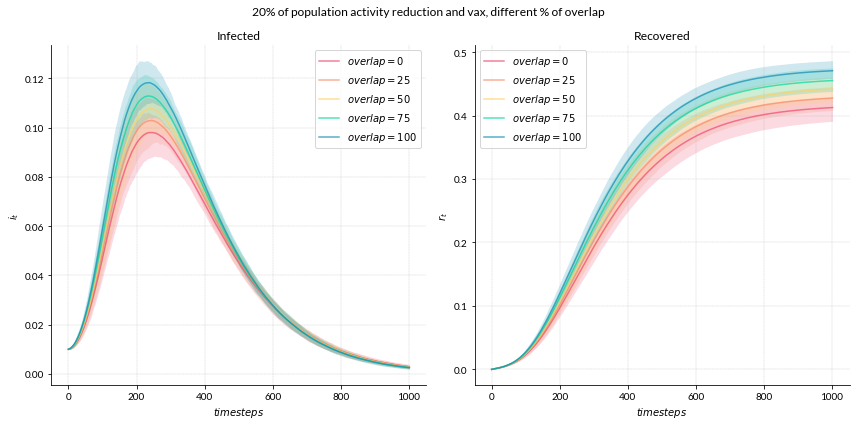

In [26]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

rows = 5
cols = 2
#caso_zero_i = plottoni(pname = f"_i_cs_00", color = "grey",label = "mask")
#caso_zero_i.plotto(axs[0])
#caso_zero_r = plottoni(pname = f"_r_cs_00", color = "grey",label = "mask")
#caso_zero_r.plotto(axs[1])
#caso_rnd_i = plottoni(pname=f"_i_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
#caso_rnd_r = plottoni(pname=f"_r_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
#caso_rnd_r.plotto(axs[1])
#caso_rnd_i.plotto(axs[0])
# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f", "#f78c6b","#ffd166", "#06d6a0", "#118ab2"]
fs = ["0", "25", "50","75", "100"]

# Create instances of datoni for each element in the matrix
for i in range(rows):
   
    # Create an instance of datoni and store it in the matrix
        
    pmatrix[i][0] = plottoni(pname = f"_i_cs_va_overlap_20_{fs[i]}", color = colori[i],label = "overlap", overlap = fs[i])
    pmatrix[i][0].plotto(axs[0])
    pmatrix[i][1] = plottoni(pname = f"_r_cs_va_overlap_20_{fs[i]}", color = colori[i],label = "overlap", overlap = fs[i])
    pmatrix[i][1].plotto(axs[1])
    axs[0].set_ylabel("$i_{t}$")
for ax in axs:
    ax.grid(True)
    ax.legend()
axs[0].legend(loc = "upper right")
axs[1].legend(loc = "upper left")
axs[0].set_title("Infected")
axs[1].set_title("Recovered")


fig.suptitle("20% of population activity reduction and vax, different % of overlap")

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_va_overlap_20_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

    
plt.tight_layout()
plt.show()

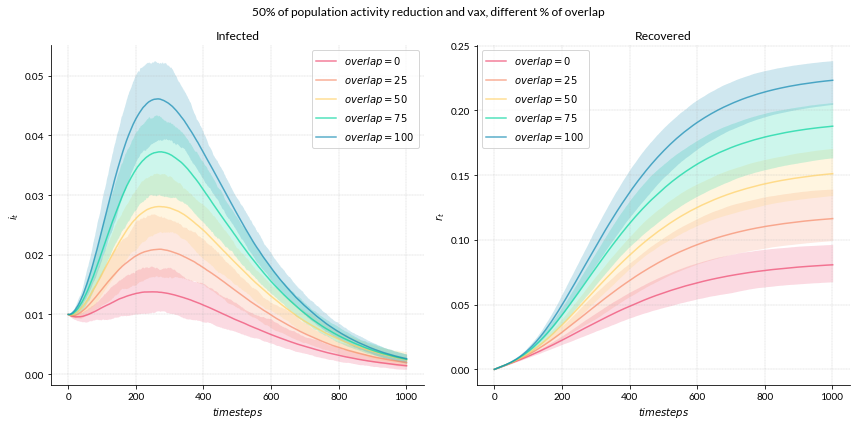

In [27]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

rows = 5
cols = 2
#caso_zero_i = plottoni(pname = f"_i_cs_00", color = "grey",label = "mask")
#caso_zero_i.plotto(axs[0])
#caso_zero_r = plottoni(pname = f"_r_cs_00", color = "grey",label = "mask")
#caso_zero_r.plotto(axs[1])
#caso_rnd_i = plottoni(pname=f"_i_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
#caso_rnd_r = plottoni(pname=f"_r_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
#caso_rnd_r.plotto(axs[1])
#caso_rnd_i.plotto(axs[0])
# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f", "#f78c6b","#ffd166", "#06d6a0", "#118ab2"]
fs = ["0", "25", "50","75", "100"]

# Create instances of datoni for each element in the matrix
for i in range(rows):
   
    # Create an instance of datoni and store it in the matrix
        
    pmatrix[i][0] = plottoni(pname = f"_i_cs_va_overlap_50_{fs[i]}", color = colori[i],label = "overlap", overlap = fs[i])
    pmatrix[i][0].plotto(axs[0])
    pmatrix[i][1] = plottoni(pname = f"_r_cs_va_overlap_50_{fs[i]}", color = colori[i],label = "overlap", overlap = fs[i])
    pmatrix[i][1].plotto(axs[1])
    axs[0].set_ylabel("$i_{t}$")
for ax in axs:
    ax.grid(True)
    ax.legend()
axs[0].legend(loc = "upper right")
axs[1].legend(loc = "upper left")
axs[0].set_title("Infected")
axs[1].set_title("Recovered")


fig.suptitle("50% of population activity reduction and vax, different % of overlap")

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_va_overlap_50_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

    
plt.tight_layout()
plt.show()

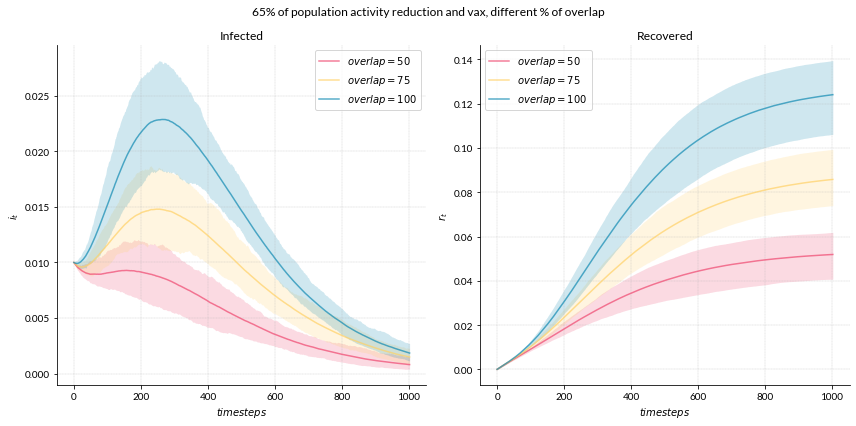

In [28]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

rows = 3
cols = 2
#caso_zero_i = plottoni(pname = f"_i_cs_00", color = "grey",label = "mask")
#caso_zero_i.plotto(axs[0])
#caso_zero_r = plottoni(pname = f"_r_cs_00", color = "grey",label = "mask")
#caso_zero_r.plotto(axs[1])
#caso_rnd_i = plottoni(pname=f"_i_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
#caso_rnd_r = plottoni(pname=f"_r_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
#caso_rnd_r.plotto(axs[1])
#caso_rnd_i.plotto(axs[0])
# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f","#ffd166",  "#118ab2"]
fs = [ "50","75", "100"]
# Create instances of datoni for each element in the matrix
for i in range(rows):
   
    # Create an instance of datoni and store it in the matrix
        
    pmatrix[i][0] = plottoni(pname = f"_i_cs_va_overlap_65_{fs[i]}", color = colori[i],label = "overlap", overlap = fs[i])
    pmatrix[i][0].plotto(axs[0])
    pmatrix[i][1] = plottoni(pname = f"_r_cs_va_overlap_65_{fs[i]}", color = colori[i],label = "overlap", overlap = fs[i])
    pmatrix[i][1].plotto(axs[1])
    axs[0].set_ylabel("$i_{t}$")
for ax in axs:
    ax.grid(True)
    ax.legend()
axs[0].legend(loc = "upper right")
axs[1].legend(loc = "upper left")
axs[0].set_title("Infected")
axs[1].set_title("Recovered")


fig.suptitle("65% of population activity reduction and vax, different % of overlap")

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_va_overlap_65_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

    
plt.tight_layout()
plt.show()

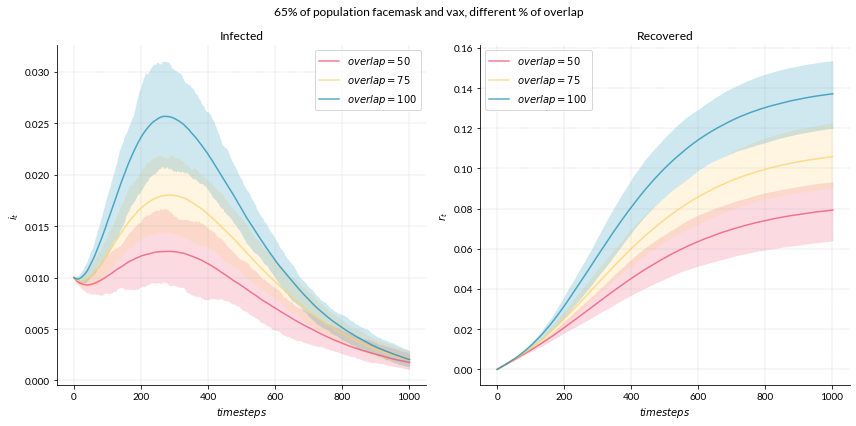

In [29]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

rows = 3
cols = 2
#caso_zero_i = plottoni(pname = f"_i_cs_00", color = "grey",label = "mask")
#caso_zero_i.plotto(axs[0])
#caso_zero_r = plottoni(pname = f"_r_cs_00", color = "grey",label = "mask")
#caso_zero_r.plotto(axs[1])
#caso_rnd_i = plottoni(pname=f"_i_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
#caso_rnd_r = plottoni(pname=f"_r_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
#caso_rnd_r.plotto(axs[1])
#caso_rnd_i.plotto(axs[0])
# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f", "#ffd166", "#118ab2"]
fs = [ "50","75", "100"]

# Create instances of datoni for each element in the matrix
for i in range(rows):
   
    # Create an instance of datoni and store it in the matrix
        
    pmatrix[i][0] = plottoni(pname = f"_i_cs_vm_overlap_65_{fs[i]}", color = colori[i],label = "overlap", overlap = fs[i])
    pmatrix[i][0].plotto(axs[0])
    pmatrix[i][1] = plottoni(pname = f"_r_cs_vm_overlap_65_{fs[i]}", color = colori[i],label = "overlap", overlap = fs[i])
    pmatrix[i][1].plotto(axs[1])
    axs[0].set_ylabel("$i_{t}$")
for ax in axs:
    ax.grid(True)
    ax.legend()
axs[0].legend(loc = "upper right")
axs[1].legend(loc = "upper left")
axs[0].set_title("Infected")
axs[1].set_title("Recovered")


fig.suptitle("65% of population facemask and vax, different % of overlap")

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_vm_overlap_65_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

    
plt.tight_layout()
plt.show()

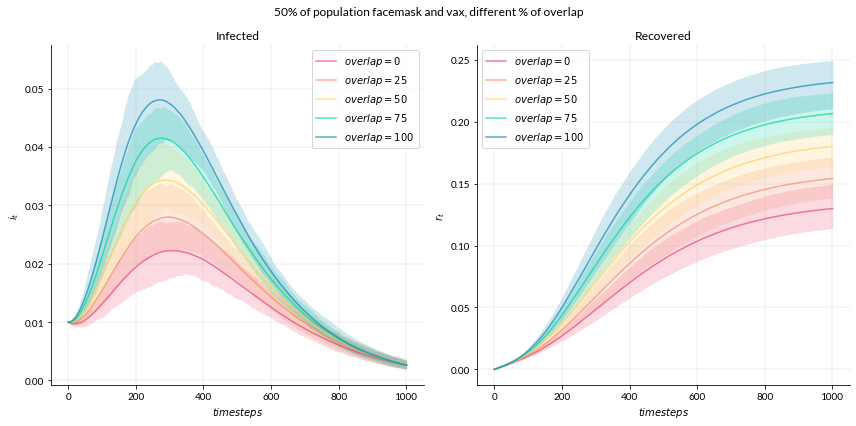

In [30]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

rows = 5
cols = 2
#caso_zero_i = plottoni(pname = f"_i_cs_00", color = "grey",label = "mask")
#caso_zero_i.plotto(axs[0])
#caso_zero_r = plottoni(pname = f"_r_cs_00", color = "grey",label = "mask")
#caso_zero_r.plotto(axs[1])
#caso_rnd_i = plottoni(pname=f"_i_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
#caso_rnd_r = plottoni(pname=f"_r_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
#caso_rnd_r.plotto(axs[1])
#caso_rnd_i.plotto(axs[0])
# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f", "#f78c6b","#ffd166", "#06d6a0", "#118ab2"]
fs = ["0", "25", "50","75", "100"]

# Create instances of datoni for each element in the matrix
for i in range(rows):
   
    # Create an instance of datoni and store it in the matrix
        
    pmatrix[i][0] = plottoni(pname = f"_i_cs_vm_overlap_50_{fs[i]}", color = colori[i],label = "overlap", overlap = fs[i])
    pmatrix[i][0].plotto(axs[0])
    pmatrix[i][1] = plottoni(pname = f"_r_cs_vm_overlap_50_{fs[i]}", color = colori[i],label = "overlap", overlap = fs[i])
    pmatrix[i][1].plotto(axs[1])
    axs[0].set_ylabel("$i_{t}$")
for ax in axs:
    ax.grid(True)
    ax.legend()
axs[0].legend(loc = "upper right")
axs[1].legend(loc = "upper left")
axs[0].set_title("Infected")
axs[1].set_title("Recovered")


fig.suptitle("50% of population facemask and vax, different % of overlap")

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_vm_overlap_50_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

    
plt.tight_layout()
plt.show()

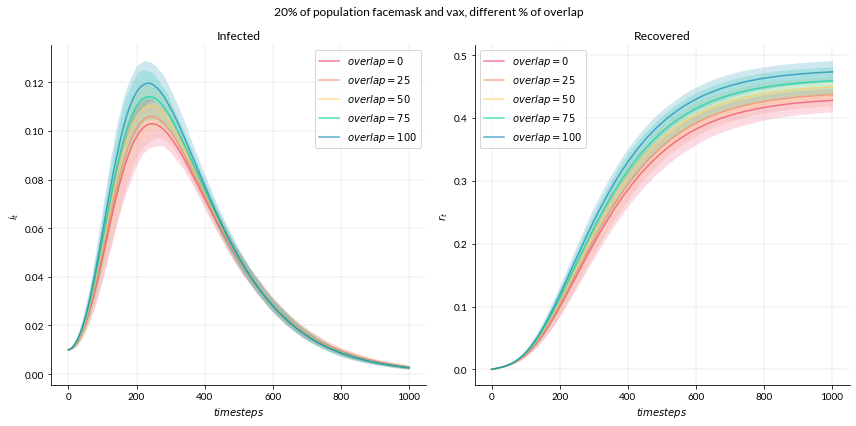

In [31]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

rows = 5
cols = 2
#caso_zero_i = plottoni(pname = f"_i_cs_00", color = "grey",label = "mask")
#caso_zero_i.plotto(axs[0])
#caso_zero_r = plottoni(pname = f"_r_cs_00", color = "grey",label = "mask")
#caso_zero_r.plotto(axs[1])
#caso_rnd_i = plottoni(pname=f"_i_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
#caso_rnd_r = plottoni(pname=f"_r_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
#caso_rnd_r.plotto(axs[1])
#caso_rnd_i.plotto(axs[0])
# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f", "#f78c6b","#ffd166", "#06d6a0", "#118ab2"]
fs = ["0", "25","50","75", "100"]

# Create instances of datoni for each element in the matrix
for i in range(rows):
   
    # Create an instance of datoni and store it in the matrix
        
    pmatrix[i][0] = plottoni(pname = f"_i_cs_vm_overlap_20_{fs[i]}", color = colori[i],label = "overlap", overlap = fs[i])
    pmatrix[i][0].plotto(axs[0])
    pmatrix[i][1] = plottoni(pname = f"_r_cs_vm_overlap_20_{fs[i]}", color = colori[i],label = "overlap", overlap = fs[i])
    pmatrix[i][1].plotto(axs[1])
    axs[0].set_ylabel("$i_{t}$")
for ax in axs:
    ax.grid(True)
    ax.legend()
axs[0].legend(loc = "upper right")
axs[1].legend(loc = "upper left")
axs[0].set_title("Infected")
axs[1].set_title("Recovered")


fig.suptitle("20% of population facemask and vax, different % of overlap")

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_vm_overlap_20_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

    
plt.tight_layout()
plt.show()

In [32]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 5
cols = 100
fs = ["0", "25", "50","75", "100"]
tot_inf = np.zeros((rows, cols))
max_inf = np.zeros((rows,cols))
for i in range(rows):
    dfi = datoni(name = f"_i_cs_va_overlap_20_{fs[i]}").datuni
    dfr = datoni(name = f"_r_cs_va_overlap_20_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    for j in range(cols):
        tot_inf[i][j] = dfi.iloc[j, -1] + dfr.iloc[j,-1]
        max_inf[i][j] =max(dfi.iloc[j, :])

#print(max_inf)


#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_20_a = np.zeros((rows-1, sam))
for i in range(rows-1):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf[-1])
        dist_20_a[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_20_a)
if isinstance(dist_20_a, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")
dist_20_a_rib = dist_20_a[::-1, :]
dis_20_a = dist_20_a_rib

sam = 1000
dist_20_a_max = np.zeros((rows-1, sam))
for i in range(rows-1):
    for j in range(sam):
        max_pick = random.choice(max_inf[i])  
        max_pick_0 = random.choice(max_inf[-1])
        dist_20_a_max[i][j] = (max_pick -max_pick_0)/max_pick_0

dist_20_a_max_rib = dist_20_a_max[::-1, :]
print(dist_20_a_max)

[[-0.11201994 -0.08297614 -0.06900419 ... -0.16824518 -0.13172499
  -0.1162452 ]
 [-0.05646968 -0.12795292 -0.04438304 ... -0.10896485 -0.07871776
  -0.05748357]
 [-0.05643369 -0.04813704 -0.07770915 ... -0.06342737 -0.06057488
  -0.0424908 ]
 [-0.05410278 -0.04945917 -0.0327038  ...  0.02399181 -0.04496595
  -0.02199268]]
The matrix is a NumPy array.
[[-0.21307464 -0.08579392 -0.20918641 ... -0.18044529 -0.15023041
  -0.03108856]
 [-0.17383454 -0.14756205 -0.11046111 ... -0.12716464 -0.24715932
  -0.17075827]
 [-0.01923238 -0.13157235 -0.04543567 ... -0.07677795  0.01900685
  -0.03532513]
 [-0.08189952 -0.01057974 -0.11263484 ... -0.11012751 -0.01152589
  -0.05096312]]


In [33]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 5
cols = 100
fs = ["0", "25", "50","75", "100"]
tot_inf = np.zeros((rows, cols))
max_inf = np.zeros((rows,cols))

for i in range(rows):
    dfi = datoni(name = f"_i_cs_va_overlap_50_{fs[i]}").datuni
    dfr = datoni(name = f"_r_cs_va_overlap_50_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    for j in range(cols):
        tot_inf[i][j] = dfi.iloc[j, -1] + dfr.iloc[j,-1]
        max_inf[i][j] =max(dfi.iloc[j, :])
  


#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_50_a = np.zeros((rows-1, sam))
for i in range(rows-1):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf[-1])
        dist_50_a[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_50_a)
if isinstance(dist_50_a, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")
dist_50_a_rib = dist_50_a[::-1, :]

sam = 1000
dist_50_a_max = np.zeros((rows-1, sam))
for i in range(rows-1):
    for j in range(sam):
        max_pick = random.choice(max_inf[i])  
        max_pick_0 = random.choice(max_inf[-1])
        dist_50_a_max[i][j] = (max_pick -max_pick_0)/max_pick_0

dist_50_a_max_rib = dist_50_a_max[::-1, :]
print(dist_50_a_max)

[[-0.70682817 -0.64828906 -0.62994375 ... -0.58394226 -0.68666305
  -0.57043839]
 [-0.47942187 -0.45433547 -0.44037605 ... -0.52469756 -0.45072926
  -0.4735259 ]
 [-0.4587512  -0.27942886 -0.31510439 ... -0.18259033 -0.35037911
  -0.35981472]
 [-0.09052073 -0.07028259 -0.17585905 ... -0.18292517 -0.17234832
  -0.17998435]]
The matrix is a NumPy array.
[[-0.70113008 -0.71768858 -0.66674072 ... -0.68460892 -0.6436015
  -0.67458324]
 [-0.53694931 -0.51484924 -0.45297933 ... -0.50381208 -0.45150273
  -0.5736481 ]
 [-0.3630137  -0.40739092 -0.36585928 ... -0.45713691 -0.45452786
  -0.4084982 ]
 [-0.13781073 -0.22271081 -0.27515081 ... -0.05407354 -0.12177889
  -0.26007401]]


In [34]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 5
cols = 100
fs = ["0", "25", "50","75", "100"]
tot_inf = np.zeros((rows, cols))
max_inf = np.zeros((rows,cols))

for i in range(rows):
    dfi = datoni(name = f"_i_cs_vm_overlap_50_{fs[i]}").datuni
    dfr = datoni(name = f"_r_cs_vm_overlap_50_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    for j in range(cols):
        tot_inf[i][j] = dfi.iloc[j, -1] + dfr.iloc[j,-1]
        max_inf[i][j] =max(dfi.iloc[j, :])
        


#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_50_m = np.zeros((rows-1, sam))
for i in range(rows-1):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf[-1])
        dist_50_m[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_50_m)
if isinstance(dist_50_m, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")

    sam = 1000
dist_50_m_rib = dist_50_m[::-1, :]

dist_50_m_max = np.zeros((rows-1, sam))
for i in range(rows-1):
    for j in range(sam):
        max_pick = random.choice(max_inf[i])  
        max_pick_0 = random.choice(max_inf[-1])
        dist_50_m_max[i][j] = (max_pick -max_pick_0)/max_pick_0

dist_50_m_max_rib = dist_50_m_max[::-1, :]
print(dist_50_m_max)

[[-0.50418136 -0.41038972 -0.41019183 ... -0.45338226 -0.34697907
  -0.39595582]
 [-0.28337406 -0.40620316 -0.37333667 ... -0.25236552 -0.28050546
  -0.307     ]
 [-0.17056689 -0.19057341 -0.21819607 ... -0.19785194 -0.20708326
  -0.25870729]
 [-0.0264658  -0.18398787 -0.17383966 ... -0.08370286 -0.14746957
  -0.05290005]]
The matrix is a NumPy array.
[[-0.34602681 -0.5279544  -0.59375    ... -0.51340426 -0.40889242
  -0.60878543]
 [-0.53806934 -0.50500556 -0.32929679 ... -0.53706594 -0.42318527
  -0.46929825]
 [-0.21755146 -0.32379395 -0.32884903 ... -0.30620985 -0.34110845
  -0.1909204 ]
 [-0.2373868   0.0478175  -0.06095278 ... -0.03338492 -0.0305236
  -0.14305807]]


In [35]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 5
cols = 100
fs = ["0", "25", "50","75", "100"]
tot_inf = np.zeros((rows, cols))
max_inf = np.zeros((rows,cols))

for i in range(rows):
    dfi = datoni(name = f"_i_cs_vm_overlap_20_{fs[i]}").datuni
    dfr = datoni(name = f"_r_cs_vm_overlap_20_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    for j in range(cols):
        tot_inf[i][j] = dfi.iloc[j, -1] + dfr.iloc[j,-1]
        max_inf[i][j] =max(dfi.iloc[j, :])        


#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_20_m = np.zeros((rows-1, sam))
for i in range(rows-1):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf[-1])
        dist_20_m[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_50_m)
if isinstance(dist_20_m, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")

dist_20_m_rib = dist_20_m[::-1, :]

sam = 1000
dist_20_m_max = np.zeros((rows-1, sam))
for i in range(rows-1):
    for j in range(sam):
        max_pick = random.choice(max_inf[i])  
        max_pick_0 = random.choice(max_inf[-1])
        dist_20_m_max[i][j] = (max_pick -max_pick_0)/max_pick_0

dist_20_m_max_rib = dist_20_m_max[::-1, :]
print(dist_20_m_max)

[[-0.50418136 -0.41038972 -0.41019183 ... -0.45338226 -0.34697907
  -0.39595582]
 [-0.28337406 -0.40620316 -0.37333667 ... -0.25236552 -0.28050546
  -0.307     ]
 [-0.17056689 -0.19057341 -0.21819607 ... -0.19785194 -0.20708326
  -0.25870729]
 [-0.0264658  -0.18398787 -0.17383966 ... -0.08370286 -0.14746957
  -0.05290005]]
The matrix is a NumPy array.
[[-0.19179015 -0.22852119 -0.19521208 ... -0.14882394 -0.06427809
  -0.09580739]
 [-0.07820692 -0.07847791 -0.09056252 ... -0.17317459 -0.15758138
  -0.16110135]
 [-0.13866161 -0.03151887 -0.05109105 ... -0.15660273 -0.20361383
   0.0041869 ]
 [-0.06153345  0.07606147 -0.14346378 ...  0.05935394 -0.00636732
  -0.05867455]]


In [37]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 3
cols = 100
fs = [ "50","75", "100"]
tot_inf = np.zeros((rows, cols))
max_inf = np.zeros((rows,cols))
for i in range(rows):
    dfi = datoni(name = f"_i_cs_va_overlap_65_{fs[i]}").datuni
    dfr = datoni(name = f"_r_cs_va_overlap_65_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    for j in range(cols):
        tot_inf[i][j] = dfi.iloc[j, -1] + dfr.iloc[j,-1]        
        #print(dfi.iloc[:, j].dtype)
        max_inf[i][j] =max(dfi.iloc[j, :])

print(max_inf)       
#print(dfi)

#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_65_a = np.zeros((rows-1, sam))
for i in range(rows-1):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf[-1])
        dist_65_a[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_65_a)
#if isinstance(dist_m, np.ndarray):
 #   print("The matrix is a NumPy array.")
#else:
 #   print("The matrix is not a NumPy array.")
    
num_rows = dist_65_a.shape[0]

# Create a new column filled with None
none_column = np.full((num_rows, 1), None)

# Horizontally stack the array with the None column
#dist_65_a_full = np.hstack((dist_65_a, none_column))
dist_65_a_rib = dist_65_a[::-1, :]


sam = 1000
dist_65_a_max = np.zeros((rows-1, sam))
for i in range(rows-1):
    for j in range(sam):
        max_pick = random.choice(max_inf[i])  
        max_pick_0 = random.choice(max_inf[-1])
        dist_65_a_max[i][j] = (max_pick -max_pick_0)/max_pick_0

dist_65_a_max_rib = dist_65_a_max[::-1, :]
print(dist_65_a_max)

[[1000. 1003. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1119. 1062. 1000.
  1280. 1000. 1029. 1224. 1190. 1024. 1000. 1064. 1223. 1000. 1000. 1000.
  1096. 1150. 1000. 1001. 1000. 1004. 1000. 1000. 1045. 1000. 1128. 1049.
  1000. 1017. 1000. 1001. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1186.
  1000. 1000. 1000. 1165. 1091. 1000. 1145. 1000. 1033. 1000. 1000. 1001.
  1112. 1000. 1000. 1000. 1001. 1002. 1016. 1057. 1000. 1214. 1033. 1226.
  1000. 1000. 1000. 1000. 1000. 1000. 1000. 1121. 1006. 1110. 1000. 1199.
  1233. 1062. 1006. 1001. 1098. 1021. 1004. 1001. 1000. 1000. 1003. 1161.
  1011. 1000. 1000. 1000.]
 [1421. 1338. 1684. 1963. 1507. 1515. 1475. 1343. 1470. 1620. 1830. 1440.
  1421. 1828. 1679. 1878. 1551. 1519. 1521. 1391. 1559. 1302. 1352. 1274.
  1703. 1557. 1683. 1466. 1349. 1683. 1785. 1556. 1474. 1440. 1550. 1399.
  1373. 1601. 1703. 1633. 1556. 1154. 1380. 1667. 1467. 1451. 1439. 1586.
  1482. 1810. 1550. 1438. 1607. 1518. 1404. 1867. 1486. 1661. 1697. 1383.
  1537. 141

In [39]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 3
cols = 100
fs = [ "50","75", "100"]
tot_inf = np.zeros((rows, cols))
max_inf = np.zeros((rows,cols))
for i in range(rows):
    dfi = datoni(name = f"_i_cs_vm_overlap_65_{fs[i]}").datuni
    dfr = datoni(name = f"_r_cs_vm_overlap_65_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    for j in range(cols):
        tot_inf[i][j] = dfi.iloc[j, -1] + dfr.iloc[j,-1]        
        #print(dfi.iloc[:, j].dtype)
        max_inf[i][j] =max(dfi.iloc[j, :])

print(max_inf)       
#print(dfi)

#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_65_m = np.zeros((rows-1, sam))
for i in range(rows-1):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf[-1])
        dist_65_m[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_65_m)


# Horizontally stack the array with the None column
#dist_65_a_full = np.hstack((dist_65_a, none_column))
dist_65_m_rib = dist_65_m[::-1, :]


sam = 1000
dist_65_m_max = np.zeros((rows-1, sam))
for i in range(rows-1):
    for j in range(sam):
        max_pick = random.choice(max_inf[i])  
        max_pick_0 = random.choice(max_inf[-1])
        dist_65_m_max[i][j] = (max_pick -max_pick_0)/max_pick_0

dist_65_m_max_rib = dist_65_m_max[::-1, :]
print(dist_65_m_max)

[[1138. 1032. 1359. 1318. 1251. 1090. 1743. 1101. 1382. 1047. 1318. 1301.
  1477. 1346. 1076. 1227. 1507. 1145. 1569. 1117. 1266. 1533. 1188. 1319.
  1542. 1446. 1408. 1536. 1341. 1245. 1307. 1015. 1529. 1423. 1090. 1368.
  1014. 1218. 1313. 1463. 1240. 1762. 1000. 1506. 1427. 1557. 1423. 1412.
  1078. 1480. 1096. 1255. 1307. 1085. 1264. 1169. 1245. 1261. 1228. 1235.
  1770. 1206. 1389. 1266. 1325. 1351. 1202. 1512. 1391. 1174. 1382. 1337.
  1537. 1434. 1369. 1523. 1321. 1125. 1253. 1701. 1347. 1220. 1114. 1250.
  1231. 1517. 1299. 1099. 1000. 1000. 1226. 1378. 1147. 1296. 1584. 1518.
  1383. 1337. 1037. 1322.]
 [1766. 1957. 1781. 2105. 1898. 1718. 1648. 2160. 1994. 2270. 1789. 1642.
  2289. 1571. 2076. 2017. 1776. 2124. 1624. 1695. 2050. 1898. 1935. 2316.
  2167. 1753. 2080. 2030. 1495. 1982. 1877. 1883. 1723. 1781. 1627. 1930.
  1744. 1764. 1666. 1508. 1740. 1893. 1964. 1783. 1899. 1889. 2172. 1964.
  1841. 1766. 1689. 1909. 2069. 1750. 1729. 1905. 2184. 1791. 1979. 1694.
  1822. 198

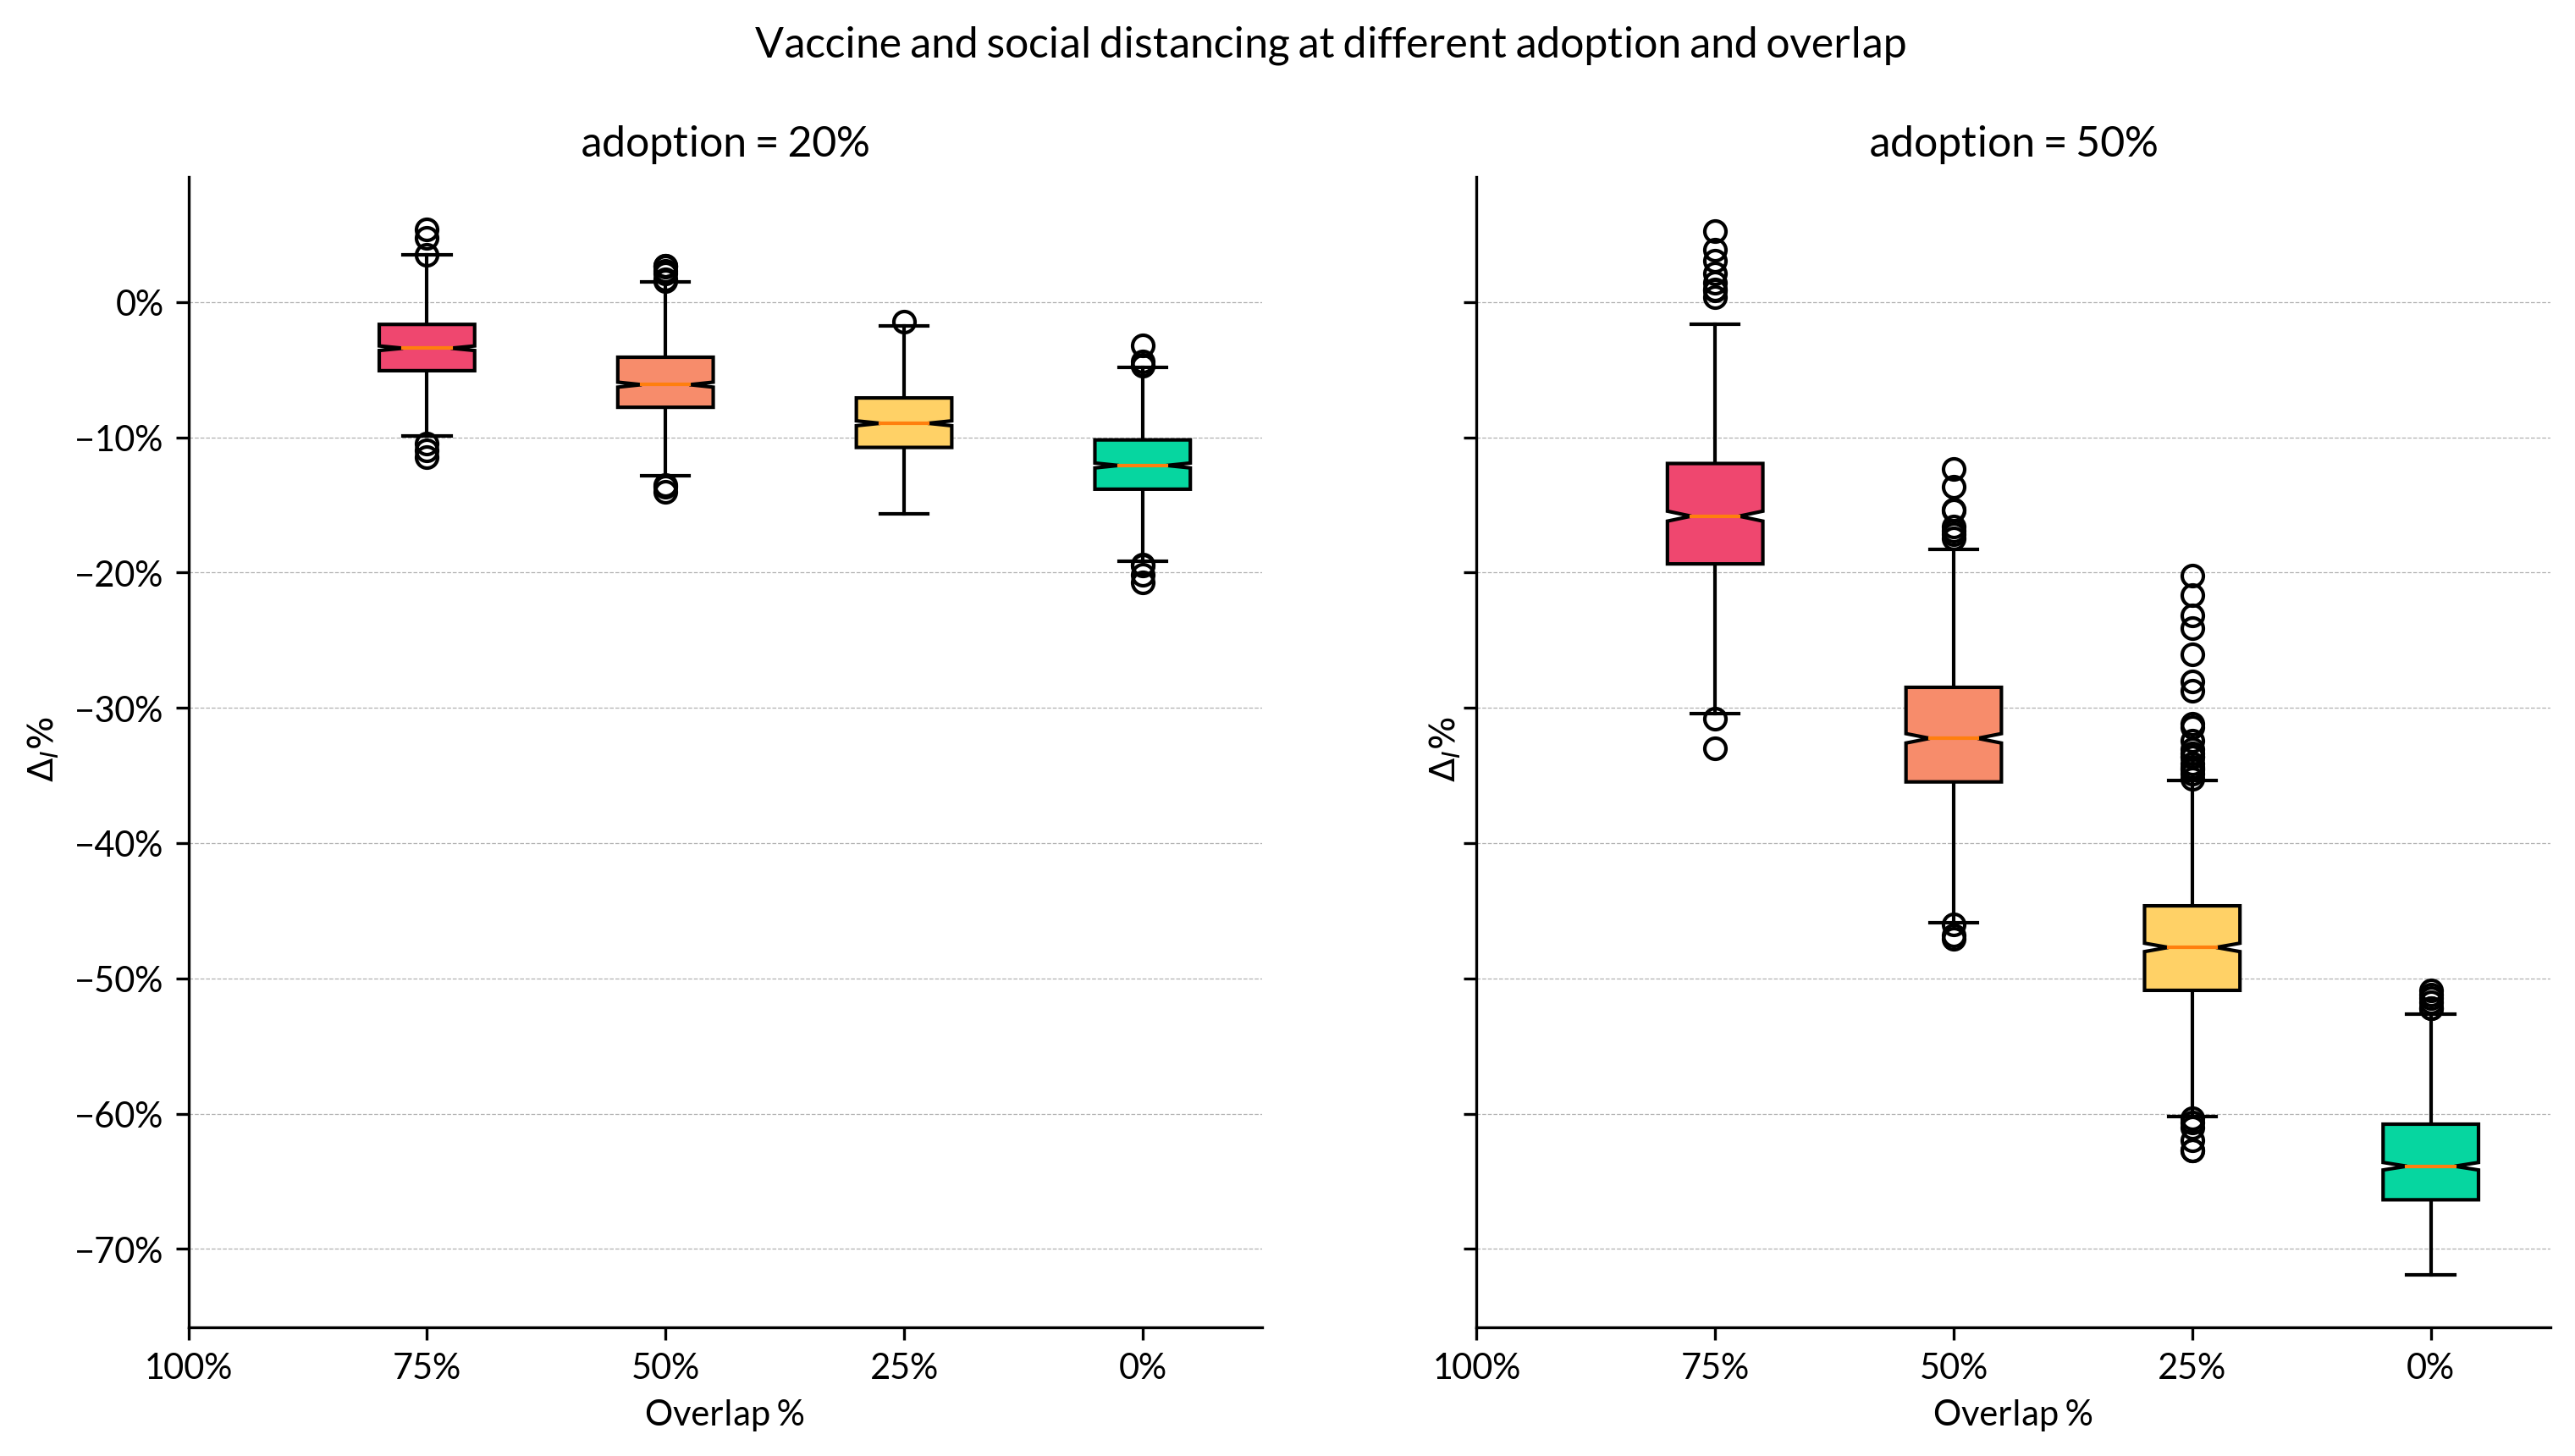

In [40]:
fig, axs = plt.subplots(ncols=2, sharey=True, dpi=300, figsize=(12,6))

custom_labels = ["100%","75%", "50%", "25%", "0%"]
#colori = [(239, 71, 111,1), (247, 140, 107,1) ,(255, 209, 102,1),(6, 214, 160,1), (17, 138, 178,1),(7, 59, 76,1)]
colori =  [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1)]
#, (7/255, 59/255, 76/255, 1) sesto colore
boxplot1 = axs[0].boxplot(np.transpose(dist_20_a_rib)*100,notch =  True,patch_artist=True, widths= 0.4);
for patch, color in zip(boxplot1['boxes'], colori):
        patch.set_facecolor(color)

boxplot2 = axs[1].boxplot(np.transpose(dist_50_a_rib*100),notch =  True,patch_artist=True, widths= 0.4);
for patch, color in zip(boxplot2['boxes'], colori):
        patch.set_facecolor(color)

#boxplot3 = axs[2].boxplot(np.transpose(dist_s2)*100,notch =  True,patch_artist=True, widths= 0.4);
#for patch, color in zip(boxplot3['boxes'], colori):
        patch.set_facecolor(color)
        
for ax in axs :
    #ax.set_xticklabels(custom_labels);
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(axis="y", linestyle="--", linewidth=0.3)
    ax.yaxis.grid(True)
    ax.set_xlabel('Overlap %')
    ax.set_ylabel(' $\Delta_I \%$')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xticks(np.arange(len(custom_labels)))
    ax.set_xticklabels(custom_labels)
fig.suptitle('Vaccine and social distancing at different adoption and overlap')
axs[0].set_title("adoption = 20%")    
axs[1].set_title("adoption = 50%")    
#axs[2].set_title("Spotty Facemask")
    
plt.show()


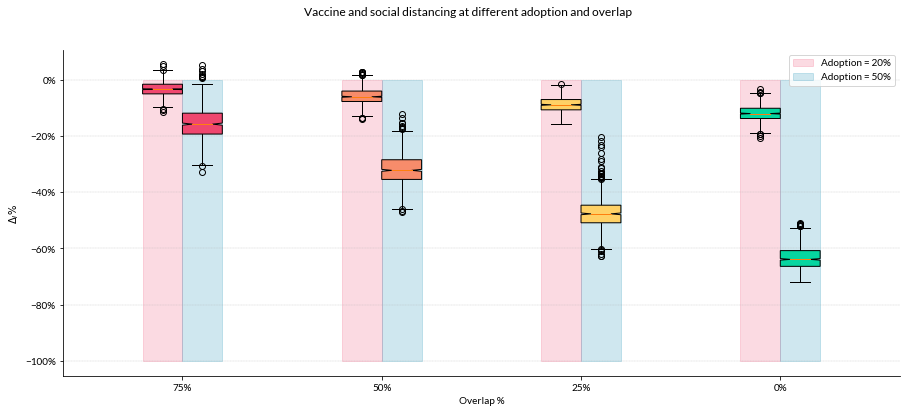

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["75%", "50%", "25%", "0%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1)]
#, (7/255, 59/255, 76/255, 1) sesto colore

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.1
positions_v = np.array(range(len(custom_labels))) + 0.1
#positions_s = np.array(range(len(custom_labels))) +0.2

for i in range(len(custom_labels)):
    ma1 = ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
    ma2 = ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
    #ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_20_a_rib)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(color)

boxplot2 = ax.boxplot(np.transpose(dist_50_a_rib)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(color)
    
#boxplot3 = ax.boxplot(np.transpose(dist_s2)*100, positions = positions_s, notch =  True,patch_artist=True, widths= 0.2);
#for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(color)

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Overlap %')
ax.set_ylabel('$\Delta_I\%$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.suptitle('Vaccine and social distancing at different adoption and overlap')

# Add legend
ax.legend([ma1, ma2], ['Adoption = 20%', 'Adoption = 50%'])

plt.show()


NameError: name 'dist_65_a_rib' is not defined

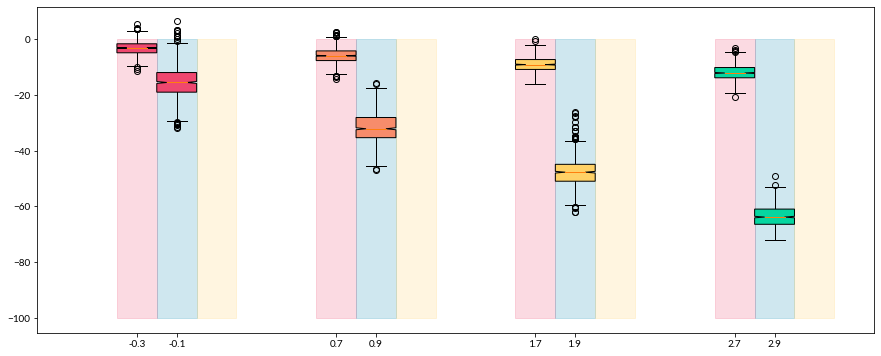

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["75%", "50%", "25%", "0%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1)]
#, (7/255, 59/255, 76/255, 1) sesto colore

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.3
positions_v = np.array(range(len(custom_labels))) - 0.1
positions_s = np.array(range(len(custom_labels))) +0.1

for i in range(len(custom_labels)):
    ma1=ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
    ma2 = ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
    ma3 = ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_20_a_rib)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(color)

boxplot2 = ax.boxplot(np.transpose(dist_50_a_rib)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(color)
    
boxplot3 = ax.boxplot(np.transpose(dist_65_a_rib)*100, positions = positions_s[:2], notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(color)

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Overlap %')
ax.set_ylabel('$\Delta_I\%$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.suptitle('Vaccine and social distancing at different adoption and overlap')

# Add legend
ax.legend([ma1, ma2, ma3], ['Adoption = 20%', 'Adoption = 50%', 'Adoption = 65%'])

ax.text(positions_s[2], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
ax.text(positions_s[3], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
plt.show()


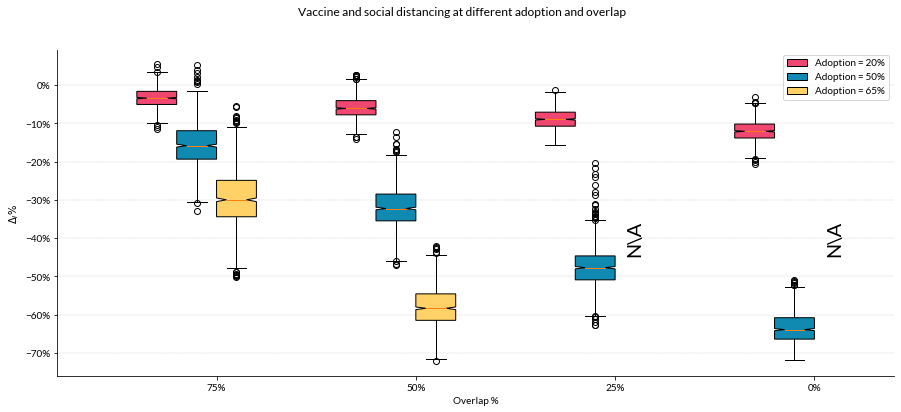

In [42]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["75%", "50%", "25%", "0%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1)]
#, (7/255, 59/255, 76/255, 1) sesto colore

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.3
positions_v = np.array(range(len(custom_labels))) - 0.1
positions_s = np.array(range(len(custom_labels))) +0.1

""""for i in range(len(custom_labels)):
    ma1=ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
    ma2 = ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
    ma3 = ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)"""
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_20_a_rib)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(colori[0])

boxplot2 = ax.boxplot(np.transpose(dist_50_a_rib)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(colori[4])
    
boxplot3 = ax.boxplot(np.transpose(dist_65_a_rib)*100, positions = positions_s[:2], notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(colori[2])

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Overlap %')
ax.set_ylabel('$\Delta_I\%$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.suptitle('Vaccine and social distancing at different adoption and overlap')

# Add legend
ax.legend([boxplot1['boxes'][1],boxplot2['boxes'][1],boxplot3['boxes'][1]], ['Adoption = 20%', 'Adoption = 50%', 'Adoption = 65%'])

ax.text(positions_s[2], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
ax.text(positions_s[3], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_deltai_va_overlap_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
plt.show()


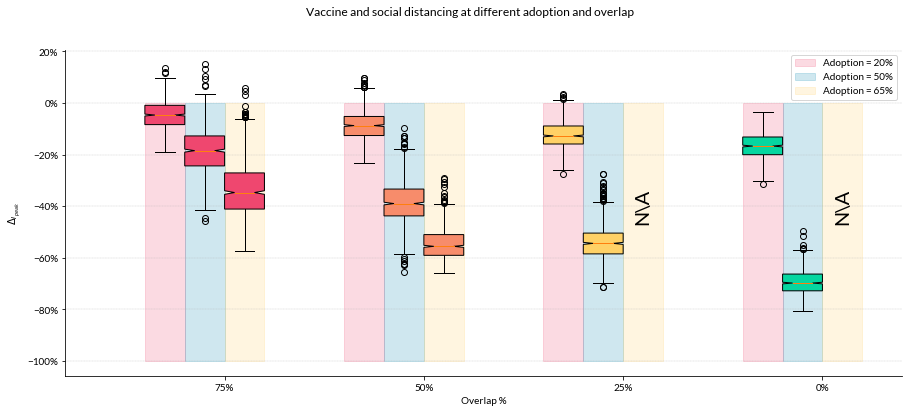

In [122]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["75%", "50%", "25%", "0%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1)]
#, (7/255, 59/255, 76/255, 1) sesto colore

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.3
positions_v = np.array(range(len(custom_labels))) - 0.1
positions_s = np.array(range(len(custom_labels))) +0.1

for i in range(len(custom_labels)):
    ma1 = ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
    ma2 = ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
    ma3 = ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_20_a_max_rib)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(color)

boxplot2 = ax.boxplot(np.transpose(dist_50_a_max_rib)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(color)
    
boxplot3 = ax.boxplot(np.transpose(dist_65_a_max_rib)*100, positions = positions_s[:2], notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(color)

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Overlap %')
ax.set_ylabel('$\Delta_{I_{peak}} %$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.suptitle('Vaccine and social distancing at different adoption and overlap')

# Add legend
ax.legend([ma1, ma2, ma3], ['Adoption = 20%', 'Adoption = 50%', 'Adoption = 65%'])

ax.text(positions_s[2], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
ax.text(positions_s[3], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
plt.show()


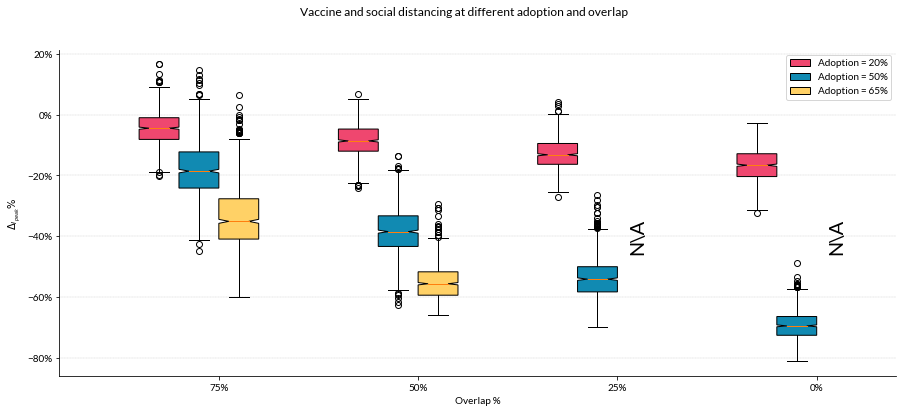

In [43]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["75%", "50%", "25%", "0%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1)]
#, (7/255, 59/255, 76/255, 1) sesto colore

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.3
positions_v = np.array(range(len(custom_labels))) - 0.1
positions_s = np.array(range(len(custom_labels))) +0.1

""""for i in range(len(custom_labels)):
    ma1=ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
    ma2 = ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
    ma3 = ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)"""
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_20_a_max_rib)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(colori[0])

boxplot2 = ax.boxplot(np.transpose(dist_50_a_max_rib)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(colori[4])
    
boxplot3 = ax.boxplot(np.transpose(dist_65_a_max_rib)*100, positions = positions_s[:2], notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(colori[2])

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Overlap %')
ax.set_ylabel('$\Delta_{I_{peak}}\%$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.suptitle('Vaccine and social distancing at different adoption and overlap')

# Add legend
ax.legend([boxplot1['boxes'][1],boxplot2['boxes'][1],boxplot3['boxes'][1]], ['Adoption = 20%', 'Adoption = 50%', 'Adoption = 65%'])

ax.text(positions_s[2], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
ax.text(positions_s[3], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_deltapeak_va_overlap_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
plt.show()


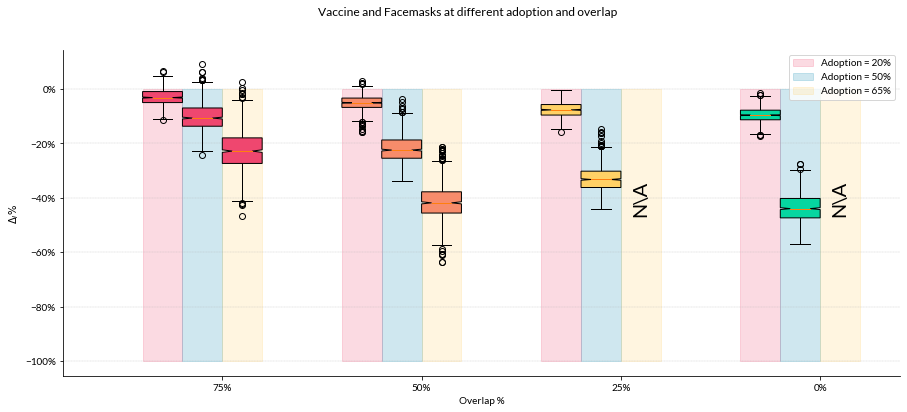

In [121]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["75%", "50%", "25%", "0%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1)]
#, (7/255, 59/255, 76/255, 1) sesto colore

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.3
positions_v = np.array(range(len(custom_labels))) - 0.1
positions_s = np.array(range(len(custom_labels))) +0.1

for i in range(len(custom_labels)):
    ma1 = ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
    ma2 = ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
    ma3 = ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_20_m_rib)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(color)

boxplot2 = ax.boxplot(np.transpose(dist_50_m_rib)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(color)
    
boxplot3 = ax.boxplot(np.transpose(dist_65_m_rib)*100, positions = positions_s[:2], notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(color)

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Overlap %')
ax.set_ylabel('$\Delta_I\%$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.suptitle('Vaccine and Facemasks at different adoption and overlap')

# Add legend
ax.legend([ma1, ma2, ma3], ['Adoption = 20%', 'Adoption = 50%', 'Adoption = 65%'])
#ax.legend([colori[0], colori[4], colori[2]], ['Adoption = 20%', 'Adoption = 50%', 'Adoption = 65%'])
ax.text(positions_s[2], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
ax.text(positions_s[3], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
plt.show()


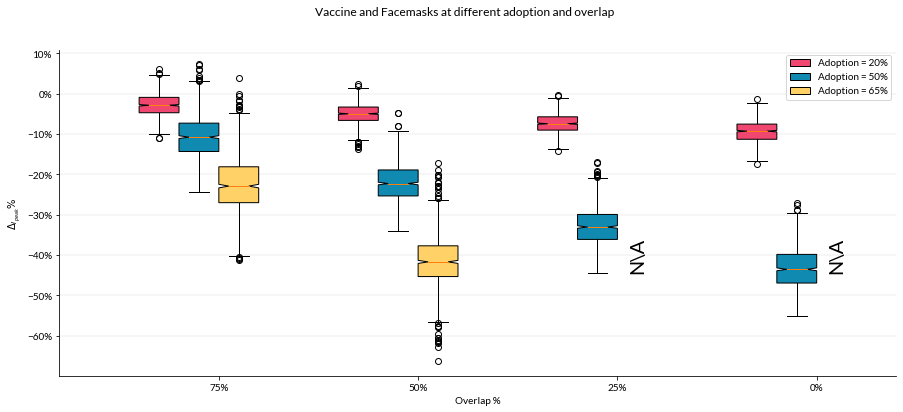

In [44]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["75%", "50%", "25%", "0%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1)]
#, (7/255, 59/255, 76/255, 1) sesto colore

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.3
positions_v = np.array(range(len(custom_labels))) - 0.1
positions_s = np.array(range(len(custom_labels))) +0.1

""""for i in range(len(custom_labels)):
    ma1=ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
    ma2 = ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
    ma3 = ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)"""
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_20_m_rib)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(colori[0])

boxplot2 = ax.boxplot(np.transpose(dist_50_m_rib)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(colori[4])
    
boxplot3 = ax.boxplot(np.transpose(dist_65_m_rib)*100, positions = positions_s[:2], notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(colori[2])

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Overlap %')
ax.set_ylabel('$\Delta_{I_{peak}}\%$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.suptitle('Vaccine and Facemasks at different adoption and overlap')

# Add legend
ax.legend([boxplot1['boxes'][1],boxplot2['boxes'][1],boxplot3['boxes'][1]], ['Adoption = 20%', 'Adoption = 50%', 'Adoption = 65%'])

ax.text(positions_s[2], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
ax.text(positions_s[3], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_deltai_vm_overlap_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
plt.show()


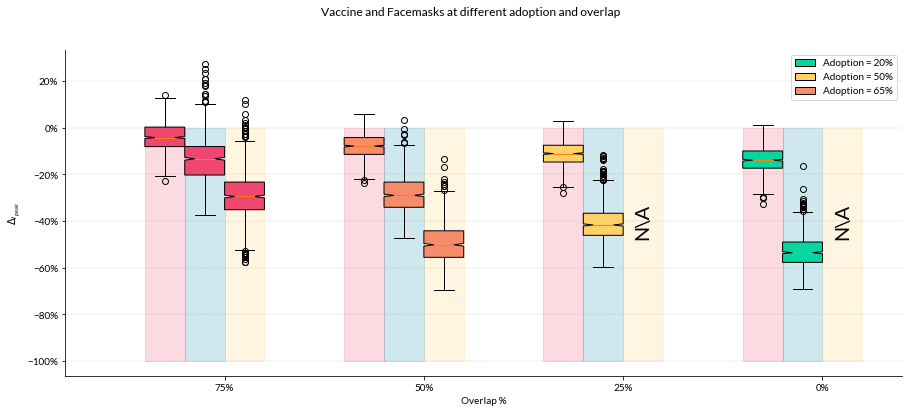

In [116]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["75%", "50%", "25%", "0%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1)]
#, (7/255, 59/255, 76/255, 1) sesto colore

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.3
positions_v = np.array(range(len(custom_labels))) - 0.1
positions_s = np.array(range(len(custom_labels))) +0.1

for i in range(len(custom_labels)):
    ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
    ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
    ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_20_m_max_rib)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(color)

boxplot2 = ax.boxplot(np.transpose(dist_50_m_max_rib)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(color)
    
boxplot3 = ax.boxplot(np.transpose(dist_65_m_max_rib)*100, positions = positions_s[:2], notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(color)

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Overlap %')
ax.set_ylabel('$\Delta_{I_{peak}} %$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.suptitle('Vaccine and Facemasks at different adoption and overlap')

# Add legend
ax.legend([boxplot1["boxes"][3], boxplot2["boxes"][2], boxplot3["boxes"][1]], ['Adoption = 20%', 'Adoption = 50%', 'Adoption = 65%'])

ax.text(positions_s[2], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
ax.text(positions_s[3], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
plt.show()


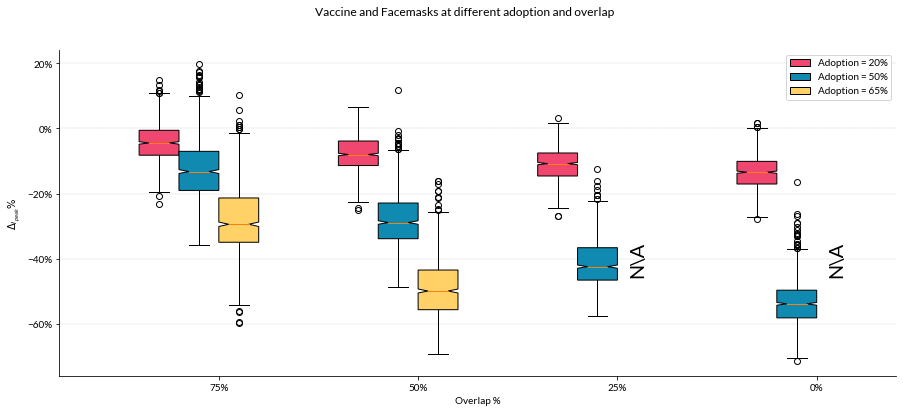

In [45]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["75%", "50%", "25%", "0%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1)]
#, (7/255, 59/255, 76/255, 1) sesto colore

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.3
positions_v = np.array(range(len(custom_labels))) - 0.1
positions_s = np.array(range(len(custom_labels))) +0.1

""""for i in range(len(custom_labels)):
    ma1=ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
    ma2 = ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
    ma3 = ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)"""
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_20_m_max_rib)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(colori[0])

boxplot2 = ax.boxplot(np.transpose(dist_50_m_max_rib)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(colori[4])
    
boxplot3 = ax.boxplot(np.transpose(dist_65_m_max_rib)*100, positions = positions_s[:2], notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(colori[2])

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Overlap %')
ax.set_ylabel('$\Delta_{I_{peak}}\%$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.suptitle('Vaccine and Facemasks at different adoption and overlap')

# Add legend
ax.legend([boxplot1['boxes'][1],boxplot2['boxes'][1],boxplot3['boxes'][1]], ['Adoption = 20%', 'Adoption = 50%', 'Adoption = 65%'])

ax.text(positions_s[2], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
ax.text(positions_s[3], -40, 'N\A', rotation=90, ha='center', va='center', fontsize=20)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_deltapeak_vm_overlap_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
plt.show()


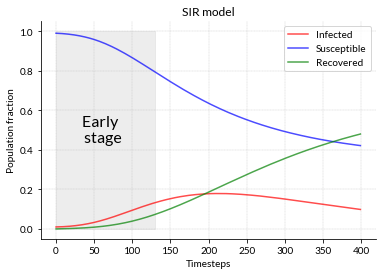

In [22]:
fig, ax = plt.subplots()

file_path_i = f"C:\\Users\\crino\\Desktop\\Thesis_ISI\\Simulations\\data_simulation\\overlap_data\\datafile_i_cs_n_overlap_0_100.csv"
file_path_r = f"C:\\Users\\crino\\Desktop\\Thesis_ISI\\Simulations\\data_simulation\\overlap_data\\datafile_r_cs_n_overlap_0_100.csv"
        
dati_i = pd.read_csv(file_path_i).T
dati_r = pd.read_csv(file_path_r).T
dati_s = 100000 - dati_i - dati_r
timesteps = range(len(dati_i.columns))

media_i = dati_i.mean() / 100000
media_r = dati_r.mean() / 100000
media_s = dati_s.mean() / 100000

ax.plot(timesteps[0:400], media_i[0:400], color="red", alpha=0.7, label="Infected" )
ax.plot(timesteps[0:400], media_s[0:400], color="blue", alpha=0.7, label="Susceptible" )
ax.plot(timesteps[0:400], media_r[0:400], color="green", alpha=0.7, label="Recovered" )
ax.legend()
ax.fill_between([0, 130], 1, 0, color="lightgrey", alpha = 0.4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="both", linestyle="--", linewidth=0.3)

ax.set_xlabel("Timesteps")
ax.set_ylabel("Population fraction")
ax.set_title("SIR model")
ax.text(60, 0.5, 'Early \n stage', ha='center', va='center', fontsize=16)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\sir_earlystage.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

plt.show()